# Final Project - Word Cloud

For this project, I have created a "word cloud" from a text by writing a script.  This script takes the text, removes punctuation, ignores case and words that do not contain all alphabets, counts the frequencies, and ignores uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from the dictionary.

For the input text of the script, I have used a book in plain text (.txt file).
<br><br>
After that the file has to be uploaded so that the script will be able to process it.  To do the upload, I used an uploader widget.  When runnning the following cell, it will perform all the installs and imports for the word cloud script and uploader widget.
<br><br>

In [ ]:
# Here are all the installs and imports used for the word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [ ]:
To upload the text file, run the following cell that contains all the code for a custom uploader widget. A "Browse" button should appear below it. Click this button and navigate the window to locate the saved text file.

In [3]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `HHGI10.TXT` (59.40 kB)


The uploader widget saved the contents of the uploaded file into a string object named *file_contents* that the word cloud script can process.

In [47]:
def calculate_frequencies(file_contents):
    """This function takes a plain text file as an argument and process it to remove punctuations and uninteresting words then passess a dictionary with the count of all words into the WordCloud module"""
    # List of punctuations and uninteresting words
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",\
     "for", "on","in","one", "not"]
    
    archivo = "" #Storage for the modified string
    
    # Eliminate all punctuations defined in the punctuations string
    for i in file_contents:
        if i not in punctuations:
            archivo += i
        else:
            continue
    
    archivo_temp = archivo.lower() # Intermediate step all letters to lower case
    
    archivo = archivo_temp.split() # Split into List
    
    # Get frequencies avoiding word defined in uninteresting_words
    frecuencias = {} 
    for word in archivo: 
        if (word in frecuencias) and (word not in uninteresting_words): 
            frecuencias[word] += 1
        elif (word not in frecuencias) and (word not in uninteresting_words):
            frecuencias[word] = 1
        else:
            continue
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frecuencias) #Passing frequencies to Wordcloud
    return cloud.to_array()

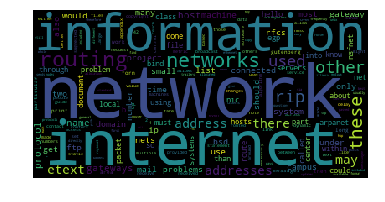

In [46]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

THE END